<a href="https://colab.research.google.com/github/Droid008/Deep-training-in-computer-vision/blob/Lesson-%231/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imageio

In [3]:
from google.colab import files

uploaded = files.upload()

Saving droideye.jpg to droideye.jpg


In [7]:
data_path = "droideye.jpg"
img =  imageio.imread(data_path)

In [8]:
img = img.astype(np.float32) / 255.
print(img.shape)

(1575, 2800, 3)


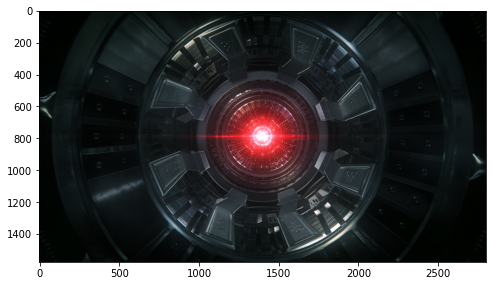

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

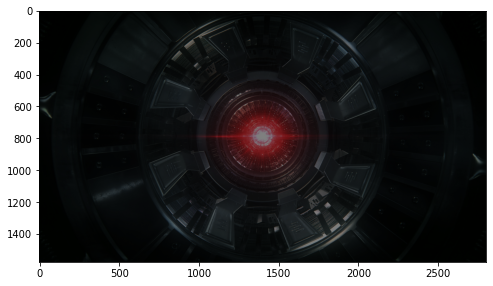

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(img/2)

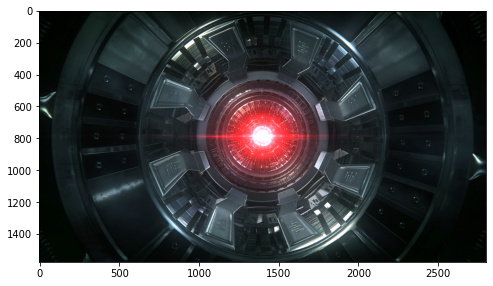

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(img*1.5)

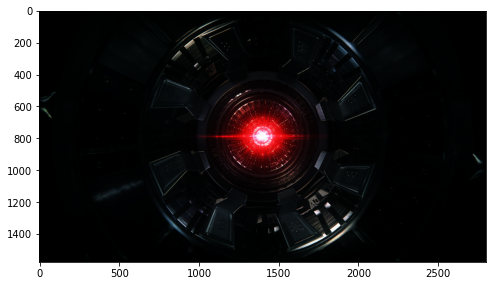

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2)

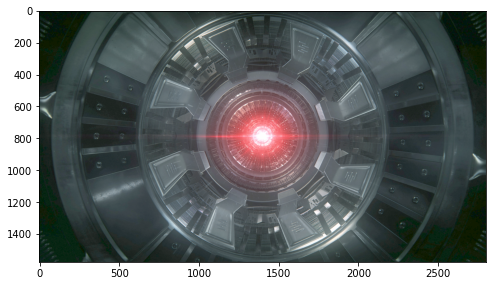

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img**0.5)

In [14]:
img_bw = np.mean(img, axis=2)

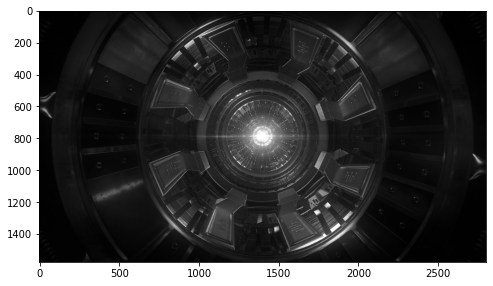

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

In [16]:
from skimage.color import rgb2hsv, hsv2rgb

In [17]:
img_hsv = rgb2hsv(img)

In [18]:
img_hsv[:5, :5, :]

array([[[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00392157]],

       [[0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00392157]],

       [[0.        , 0.        , 0.00392157],
        [0.        , 0.   

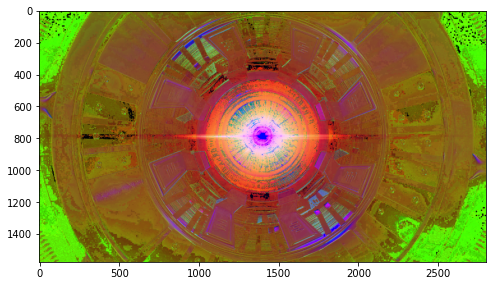

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_hsv)

In [20]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] /= 3
img_new = hsv2rgb(img_hsv_new)

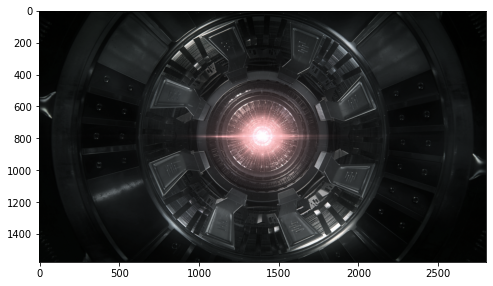

In [21]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

In [22]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 1] *= 4
img_new = hsv2rgb(img_hsv_new)

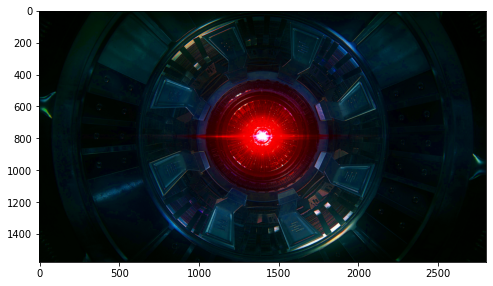

In [23]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

In [24]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] /= 3
img_new = hsv2rgb(img_hsv_new)

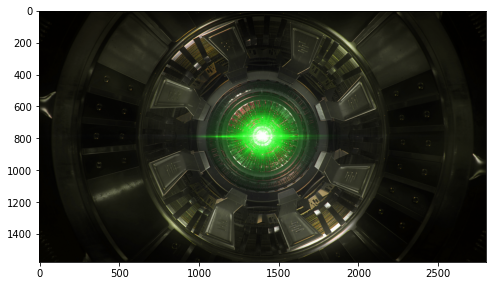

In [25]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

In [26]:
def conv(img, w):
    out_img = np.zeros(
        (img.shape[0] - w.shape[0] + 1,
         img.shape[1] - w.shape[1] + 1,
         img.shape[2]), 
         dtype=np.float32)
    
    for c in range(out_img.shape[2]):
        for i in range(out_img.shape[0]):
            for j in range(out_img.shape[1]):
                x = img[i:i+w.shape[0], j:j+w.shape[1], c]
        
                out_img[i,j,c] = np.sum(w * x)
    
    return out_img

In [27]:
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                        -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

new_img = conv(img, w)

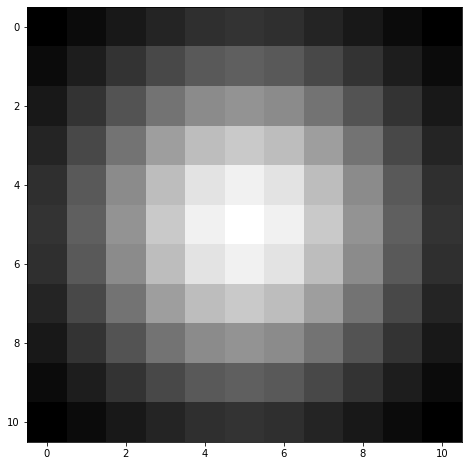

In [28]:
plt.figure(figsize=(8, 8))
plt.imshow(w, cmap='gray')
plt.show()

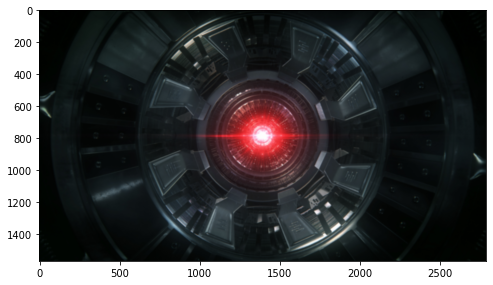

In [29]:
plt.figure(figsize=(8, 8))
plt.imshow(new_img)
plt.show()

In [30]:
import scipy.signal

In [31]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

CPU times: user 3.92 s, sys: 13.1 ms, total: 3.93 s
Wall time: 3.91 s


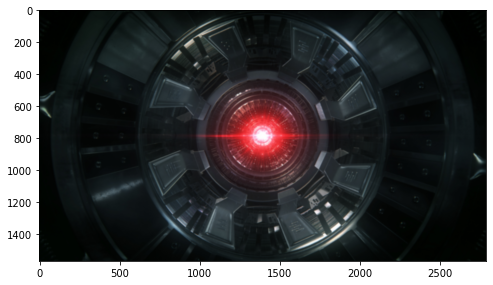

In [32]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)

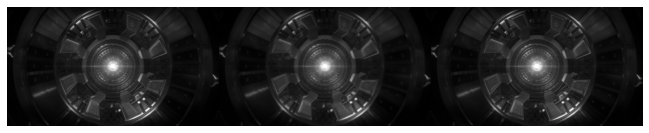

In [33]:
from scipy import ndimage

blurred_img = ndimage.gaussian_filter(img_bw, sigma=3)
very_blurred = ndimage.gaussian_filter(img_bw, sigma=5)

local_mean = ndimage.uniform_filter(img_bw, size=11)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(blurred_img, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(very_blurred, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(local_mean, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

plt.show()